In [15]:
!pip install gymnasium pygame --quiet


In [17]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [18]:
env_names = ["MountainCar-v0", "Pendulum-v1"]


In [19]:
def analyze_env(env_name, steps=500):
    env = gym.make(env_name, render_mode="rgb_array")
    obs, info = env.reset()

    print(f"\n📦 Environment: {env_name}")
    print("-" * 40)
    print(f"Observation space: {env.observation_space}")
    print(f"Action space: {env.action_space}")

    if hasattr(env.action_space, 'n'):
        action_type = "Discrete"
    else:
        action_type = "Continuous"

    print(f"Action type: {action_type}")

    done = False
    episode_reward = 0
    episode_length = 0

    for _ in range(steps):
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        episode_length += 1
        done = terminated or truncated

        if episode_length % 5 == 0:
            clear_output(wait=True)
            plt.imshow(env.render())
            plt.axis("off")
            plt.title(f"{env_name} | Step {episode_length}")
            plt.show()
            time.sleep(0.01)

        if done:
            break

    env.close()

    print(f"🎯 Episode reward: {episode_reward:.2f}")
    print(f"🕒 Episode length: {episode_length} steps")

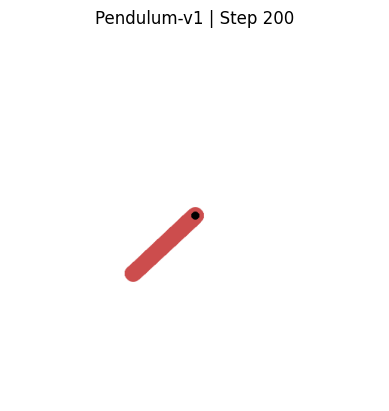

🎯 Episode reward: -1087.25
🕒 Episode length: 200 steps


In [20]:

for env in env_names:
    analyze_env(env)


In [21]:
env = gym.make(env_names[0])
obs, info = env.reset()

print(f"🔎 Sample observations and actions from {env_names[0]}:\n")

for i in range(10):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    print(f"Step {i+1}:")
    print(f"  Observation: {obs}")
    print(f"  Action taken: {action}")
    print(f"  Reward: {reward}")
    print(f"  Terminated: {terminated}, Truncated: {truncated}\n")
    if terminated or truncated:
        break
env.close()

🔎 Sample observations and actions from MountainCar-v0:

Step 1:
  Observation: [-5.960207e-01  5.428765e-04]
  Action taken: 1
  Reward: -1.0
  Terminated: False, Truncated: False

Step 2:
  Observation: [-5.9593892e-01  8.1777835e-05]
  Action taken: 0
  Reward: -1.0
  Terminated: False, Truncated: False

Step 3:
  Observation: [-0.59531885  0.00062008]
  Action taken: 1
  Reward: -1.0
  Terminated: False, Truncated: False

Step 4:
  Observation: [-5.9516501e-01  1.5384021e-04]
  Action taken: 0
  Reward: -1.0
  Terminated: False, Truncated: False

Step 5:
  Observation: [-0.59447855  0.00068647]
  Action taken: 1
  Reward: -1.0
  Terminated: False, Truncated: False

Step 6:
  Observation: [-5.9426445e-01  2.1407420e-04]
  Action taken: 0
  Reward: -1.0
  Terminated: False, Truncated: False

Step 7:
  Observation: [-0.5935244   0.00074011]
  Action taken: 1
  Reward: -1.0
  Terminated: False, Truncated: False

Step 8:
  Observation: [-5.9326369e-01  2.6070987e-04]
  Action taken: 0
  

In [22]:
env = gym.make(env_names[0], render_mode="rgb_array")
obs, info = env.reset()
frame = env.render()
plt.imsave("sample_frame.png", frame)
env.close()

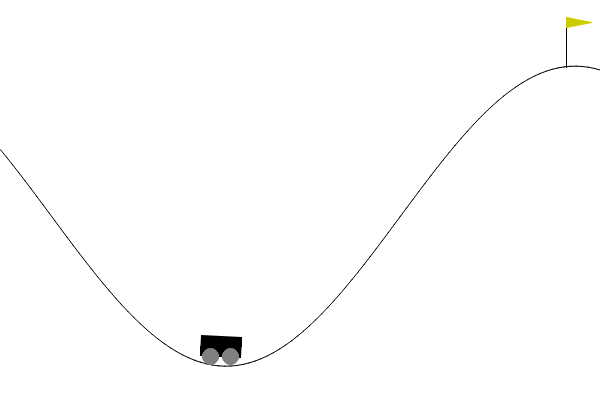

In [23]:
from PIL import Image
from io import BytesIO
from IPython.display import Image as IPImage, display

def display_env_gif(env_name, steps=100):
    env = gym.make(env_name, render_mode="rgb_array")
    obs, info = env.reset()
    frames = []

    for _ in range(steps):
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        frame = env.render()
        frames.append(Image.fromarray(frame))
        if terminated or truncated:
            break
    env.close()

    gif_buffer = BytesIO()
    frames[0].save(gif_buffer, format="GIF", save_all=True,
                   append_images=frames[1:], duration=50, loop=0)
    gif_buffer.seek(0)

    display(IPImage(data=gif_buffer.getvalue()))

display_env_gif(env_names[0])


In [ ]:
|